In [102]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd 
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn import model_selection
from warnings import filterwarnings
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


filterwarnings("ignore")


class Visualization():
    def __init__(self,data):
        self.df = data
    
    def scatter(self,x,y,z = None):
        scatter = sns.scatterplot(x = x, y = y, hue=z,data=self.df)
        return scatter
    
    def hist(self,x):
        plt.figure(figsize=(8,6))
        hist = sns.distplot(self.df[[x]], rug=True, rug_kws={"color":"g"}, kde_kws={"color":"k","lw":3,"label":"KDE"},
                            hist_kws={"histtype":"step","linewidth":"3","alpha":1,"color":"g"})
        
        return hist
    
    def hist1(self,x,y=None):
        hist1 = sns.FacetGrid(self.df,hue=y,height=5).map(sns.kdeplot,x,shade = True).add_legend()
        return hist1
    
    def corr_map(self):
        df = self.df.corr()
        plt.figure(figsize=(8.5,5.5))
        corr = sns.heatmap(df,xticklabels=df.columns,yticklabels=df.columns,annot=True)
        return corr
        
    
    
    def bar(self,x,y,z = None):
        plt.figure(figsize=(8.5,5.5))
        bruhh = sns.barplot(x = x, y = y, hue=z,data=self.df,capsize=.2)
        return bruhh
    
    def boxplot(self,x,y=None,z = None):
        box = sns.boxplot(x = x, y = y, hue=z, data=self.df,linewidth=2.5)
        return box
    
    def heatmap(self):
        pass
    
    def missingvalues_heat_map(self):
        heatmap = msno.heatmap(self.df)
        return heatmap
    
    def missingvalues_dendogram(self):
        
        dendogram = msno.dendrogram(self.df)
        return dendogram


class information():
    def __init__(self,data):
        self.df = data
    
    def info_data(self):
        """İnfo about data"""
        information = self.df.info()
        shape = self.df.shape
        return print(information,"\nBoyut Bilgisi:\n",shape)
    
    def summary_statistics(self):
        info = self.df.describe().T
        return info
    
    def value_count(self,x,y=None):
        """Write X with two quotes"""
        counts = self.df[x].value_counts()
        counts1 = self.df[y].value_counts()
        print("First Variable Value Counts:\n",counts,"\nSecond Variable Value Counts:\n",counts1)
        
    
    def nuniques(self):
        unique = self.df.nunique()
        return unique
    
    def MissingValues(self):
        missing_values = self.df.isnull().sum()
        missing_values_rate = (self.df.isnull().sum() * 100) / self.df.shape[0]
        df_Missing_values = missing_values
        df_Missing_values_rate = missing_values_rate
        table = pd.concat([df_Missing_values,df_Missing_values_rate],axis=1)
        table = table.rename(columns={0:"Missing_Values",1:"Missing_values_rate %"})
        return table
    
class preprocess():
    
    def __init__(self,df):
        self.df = df
    
    def outlier(self):
        
        lower_and_upper = {}
        
        columns = list(self.df.select_dtypes(include=["float64","int64"]))
        
        for col in columns:
            q1 = self.df[col].quantile(0.25)
            q3 = self.df[col].quantile(0.75)
            iqr = 1.5*(q3-q1)
    
            lower_bound = q1-iqr
            upper_bound = q3+iqr
    
            lower_and_upper[col] = (lower_bound, upper_bound)
            self.df.loc[(self.df.loc[:,col]<lower_bound),col]=lower_bound
            self.df.loc[(self.df.loc[:,col]>upper_bound),col]=upper_bound
         
        return self.df
 
    
class statistic():
    def __init__(self,df):
        
        self.df = df

        
    def normal(self):
        
        normal_dagilanlar = []
        normal_dagilmayanlar = []
        columns = list(self.df)
        alpha = 0.05
    
        for col in columns:
            result = shapiro(self.df[[col]])
        
            if result[1] < alpha:
                normal_dagilmayanlar.append(col)
            
            elif result[1] > alpha:
                normal_dagilanlar.append(col)
            
        
        print("Normal dagilimdan gelenler: ",normal_dagilanlar,
    
        "\nNormal dagilimdan gelmeyenler: \n",normal_dagilmayanlar)
        
        
        
    def yakala(self,df,Y):
        anlamli_kat_sayilar = []
        target = Y
        columns = list(df.drop(target,axis=1))
        sonuclar = []
        for col in columns:
        
            X = df[[col]]
            y = df[target]
            lm = sm.OLS(y,X)
            model = lm.fit()
            if (model.tvalues.values > 1.96):
                anlamli_kat_sayilar.append(model.tvalues.index)
        
            elif (model.tvalues.values < -1.96):
                anlamli_kat_sayilar.append(model.tvalues.index)
            
            
        for i in anlamli_kat_sayilar:
        
            print("Anlamli Kat sayilar: ",i[0])


class Methods():

    def __init__(self):
        """Methods of machine learning"""

    

    
    
    def LogitReg(self,x_train,y_train,x_test,y_test):
        loj = sm.Logit(y_train,x_train)
        loj_model = loj.fit()
        result = loj_model.summary()
    
   
        solver = input("Please enter any method for solver: ")
    
        loj1 = LogisticRegression(solver = solver) # Liblinear yerine baska yontemler var bunun bunlar da data yapisina gore sonuclar vermekte
        loj_model1 = loj1.fit(x_train,y_train)
        loj_model1
        intercept = loj_model1.intercept_
        coef_sklearn = loj_model1.coef_
    
    
        print("OLS Results: \n",result)
        print("\nSklearn Results of intercept and coef: \n")
        print("Intercept: \n",intercept)
        print("Coef: \n",coef_sklearn)
        print("------------------------------------")
        print("------------------------------------")
        print("------------------------------------")
        print("OLS and Sklearn result are diffrent beacuse OLS result haven't Intercept")
        
        
        
        
    def LojPredict(self,x_train,y_train,x_test,y_test):
        
        print("this func shows us Acuary value for both train and test set\nThen Same kind Confusion Matirx and result details\nWe will see Cross_val values each sets\nAt the end we'll see  ROC CURVE with made of TRAIN set  ")
        
        solver = input("Please enter any method for solver: ")
    
        loj1 = LogisticRegression(solver = solver) # Liblinear yerine baska yontemler var bunun bunlar da data yapisina gore sonuclar vermekte
        loj_model1 = loj1.fit(x_train,y_train)
    
        y_pred = loj_model1.predict(x_test)
    
        accuary = accuracy_score(y_test,y_pred)
        confusion = confusion_matrix(y_test,y_pred)
        result_detail = classification_report(y_test,y_pred)
    
    
        logit_roc_auc = roc_auc_score(y_train,loj_model1.predict(x_train))
        fpr, tpr, tresholds = roc_curve(y_train,loj_model1.predict_proba(x_train)[:,1])

        ROC = plt.figure(),
        plt.plot(fpr, tpr, label = "AUC (area = %0.2f)"% logit_roc_auc),
        plt.plot([0,1], [0,1], "r--"),
        plt.xlim([0.0, 1.0]),
        plt.ylim([0.0,1.05]),plt.xlabel("False Positive Orani"),
        plt.ylabel("Ture Positive Orani"),
        plt.title("ROC")
    
    
        cross_val_train = cross_val_score(loj_model1, x_train, y_train, cv = 10).mean()
        cross_val_test = cross_val_score(loj_model1, x_test, y_test, cv = 10).mean()

    
    
        print("Accuary : ",accuary)
        print("-------------------")
        print("Confusion Matrix: \n",confusion)
        print("-------------------")
        print("Details: \n",result_detail)
        print("-------------------")
        print("Cross Validaiton About TRAIN and TEST set: \n",cross_val_train," \n",cross_val_test)
        print("-------------------")
        print("ROC CURVE: \n",ROC)
    
        
        
        
    def LogitSelf(self,x_train,y_train,x_test,y_test):
    
        print("This func job is if you given a TRESHOLD value it will use that and shows new results\n")
    
        solver = input("Please enter any method for solver: ")
        threshold = float(input("Please enter TRESHOLD value: "))
    
        loj1 = LogisticRegression(solver = solver) 
        loj_model1 = loj1.fit(x_train,y_train)
    
        y_probs = loj_model1.predict_proba(x_train)
        y_probs = y_probs[:,1]
        y_pred = [1 if i > threshold else 0 for i in y_probs]
    
        accuary = accuracy_score(y_train,y_pred)
        confusion = confusion_matrix(y_train,y_pred)
        result_detail = classification_report(y_train,y_pred)
    
    
        print("Accuary : ",accuary)
        print("-------------------")
        print("Confusion Matrix: \n",confusion)
        print("-------------------")
        print("Details: \n",result_detail)
        
        


    def PcaReg(self,x_train,y_train,x_test,y_test):
        pcr = PCA()
        pca = PCA()
        X_reduced_train = pcr.fit_transform(scale(x_train))
    
        bilesen_yuzde = np.cumsum(np.round(pcr.explained_variance_ratio_, decimals = 4)*100)[:]
    
        features = range(pcr.n_components_)
    
        #bilesen_gorsel = plt.bar(features,pcr.explained_variance_ratio_,color = "red"),plt.xlim(0,20),
        #plt.xlabel("PCA Bilesenler"),plt.ylabel("Aciklanan Varyans %"),plt.xticks(features)
    
        bilesen_gorsel = plt.figure(figsize=(25,8)),plt.bar(features,pcr.explained_variance_ratio_,color = "red"),plt.xlim(0,25),
        plt.xlabel("PCA Bilesenler"),plt.ylabel("Aciklanan Varyans %"),plt.xticks(features)
    
    
    
        lm = LinearRegression()

        pcr_model = lm.fit(X_reduced_train[:,:], y_train)  

        sm1 = sm.OLS(y_train,X_reduced_train[:,:])
        pcr_model_v  = sm1.fit()
    
    
        print("Bilesen sayisina gore aciklanabilirlik: \n",bilesen_yuzde)
        print("------------------------------------------")
        print("Bilesen sayisina gore aciklanma durumu",bilesen_gorsel)
        print("------------------------------------------")
        print("\nTrain setine ait sabit Kat sayi: \n",pcr_model.intercept_,"\nTrain setine ait modelin kat sayilari: \n",pcr_model.coef_)
        print("OLS sonuclari : \n",pcr_model_v.summary().tables[0]) 

        
        
    def PcaPredict(self,x_train,y_train,x_test,y_test):
        pcr = PCA()
        X_reduced_train = pcr.fit_transform(scale(x_train))
    
        lm = LinearRegression()
    
    
    
    
        pcr_model = lm.fit(X_reduced_train[:,:], y_train)  
    
    
        y_pred = pcr_model.predict(X_reduced_train[:,:]) 
        train_result = np.sqrt(mean_squared_error(y_train,y_pred))
    
        pcr1 = PCA()

        X_reduced_test = pcr1.fit_transform(scale(x_test))

        y_pred1 = pcr_model.predict(X_reduced_test[:,:]) # yine 4 bilesen 


        test_result = np.sqrt(mean_squared_error(y_test,y_pred1))
        train_r2 = r2_score(y_train,y_pred)
    
        cv_10 = model_selection.KFold(n_splits=10,
                             shuffle=True,
                             random_state=1)
    
    
    
        RMSE = []

        for i in np.arange(1, X_reduced_train.shape[1]+1):
        
            score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                          X_reduced_train[:,:i],
                                                          y_train.ravel(),
                                                          cv = cv_10,
                                                          scoring = "neg_mean_squared_error").mean())
    
            RMSE.append(score)
    
    
    
    

        Degerlendirme = plt.plot(RMSE, "-v"),
        plt.xlabel("Bilesen sayisi"),plt.ylabel("RMSE"),
        plt.title("Tahmin Modeli Icin Pcr Model Tune");
    
    
    
        print("Train setinin RMSE degeri: \n",train_result,"\nTest setinin RMSE degeri: \n",test_result)
        print("---------------------------------------------------------------------------")
        print("R2 degeri: ",train_r2)
        print("---------------------------------------------------------------------------")
        print("Bilesenlere gore RMSE durumu cross validation ile: \n",Degerlendirme)
        
        
        
        

    def YsaClassifier(X_train,y_train,X_test,y_test):
        scaler = StandardScaler()

        X_train_scale = scaler.fit_transform(X_train)

        X_test_scale =  scaler.fit_transform(X_test)
  
  
        mlp_regres = MLPClassifier().fit(X_train_scale,y_train) 
        y_pred = mlp_regres.predict(X_test_scale)
        Accuaracy = accuracy_score(y_test,y_pred)
        matrix = confusion_matrix(y_test,y_pred)
  # tune edelim

        params = {"alpha":[0.1,0.01,0.02,0.005], # alpha icin aranacak degerler
              "hidden_layer_sizes":[(20,20),(100,50,150),(300,200,150)], # gizli katmanin dereceleri ve sayilari icin aranacak parametreler
              "activation":["relu","logistig"],
              'solver': ['adam', 'lbfgs']}# Son olarak birde iki tane fonksiyon var onlari denesin denedik 

        mlp_c = MLPClassifier()
  
        mlp_c = GridSearchCV(mlp_c,params,
                       cv = 10,
                       n_jobs = -1,
                       verbose = 2)

        mlp_c_tune = mlp_c.fit(X_train_scale,y_train)

        bos = []
        for i in mlp_c_tune.best_params_:
            bos.append(mlp_c_tune.best_params_[i])

        mlp_tuned = MLPClassifier(activation=bos[0],
                         alpha=bos[1],hidden_layer_sizes=bos[2],
                         solver=bos[3]).fit(X_train_scale,y_train)

        y_pred1 = mlp_tuned.predict(X_test_scale)

        Accuaracy1 = accuracy_score(y_test,y_pred1)
        matrix1 = confusion_matrix(y_test,y_pred1)


        print("Tune Edilmemis Tahmin sonuclari Accuracy degeri: ",Accuaracy)
        print("-------------------------------")
        print("Tune Edilmemis Confusion matrix sonuc: \n",matrix)
        print("****************************************************")
        print("Tune sonrasi Tahmin sonuclari RMSE degeri:",Accuaracy1)
        print("-------------------------------")
        print("Tune sonrasi Confusion matrix sonuc: \n",matrix1)
        
        
        


    def YsaReg(X_train,y_train,X_test,y_test):
        
        scaler = StandardScaler()

        X_train_scale = scaler.fit_transform(X_train)

        X_test_scale =  scaler.fit_transform(X_test)
  
  
        mlp_regres = MLPRegressor().fit(X_train_scale,y_train) 
        y_pred = mlp_regres.predict(X_test_scale)
        rmse = np.sqrt(mean_squared_error(y_test,y_pred))

  # tune edelim

        params = {"alpha":[0.1,0.01,0.02,0.005], # alpha icin aranacak degerler
             "hidden_layer_sizes":[(20,20),(100,50,150),(300,200,150)], # gizli katmanin dereceleri ve sayilari icin aranacak parametreler
             "activation":["relu","logistig"],
              'solver': ['adam', 'lbfgs'],
              'learning_rate': ['constant','adaptive']}# Son olarak birde iki tane fonksiyon var onlari denesin denedik 

        mlp_cv_model = GridSearchCV(mlp_regres,params,cv = 10)

        mlp_cv_model = mlp_cv_model.fit(X_train_scale,y_train)

        bos = []
        for i in mlp_cv_model.best_params_:
            bos.append(mlp_cv_model.best_params_[i])

        mlp_tuned = MLPRegressor(activation=bos[0],
                         alpha=bos[1],hidden_layer_sizes=bos[2],
                         learning_rate=bos[3],
                         solver=bos[4]).fit(X_train_scale,y_train)

        y_pred = mlp_tuned.predict(X_test_scale)

        new_rmse = np.sqrt(mean_squared_error(y_test,y_pred))


        print("Tune Edilmemis Tahmin sonuclari RMSE degeri: ",rmse)
        print("---------------------------------------------")
        print("Tune sonrasi Tahmin sonuclari RMSE degeri:",new_rmse)
        
        
    def DecisionReg(self,X_train, y_train,X_test,y_test):
        
        cart_model = DecisionTreeRegressor()
        cart_model.fit(X_train, y_train)

        y_pred =cart_model.predict(X_test)
        first = np.sqrt(mean_squared_error(y_test, y_pred))

        

        cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10),
               "min_samples_leaf": range(2,20)}

        cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

        cart_cv_model.fit(X_train, y_train)
        bos = []
        for i in cart_cv_model.best_params_:
            bos.append(cart_cv_model.best_params_[i])

        cart_tuned = DecisionTreeRegressor(max_leaf_nodes = bos[0], min_samples_leaf = bos[1] ,min_samples_split = bos[2])
        cart_tuned.fit(X_train, y_train)
        y_pred = cart_tuned.predict(X_test)
        after = np.sqrt(mean_squared_error(y_test, y_pred)) 

        print("En iyi parametre degerleri: ",cart_cv_model.best_params_)
        print("Tune edilmemis rmse: ",first,"\nTune sonrasi rmse: ",after)
        
        
        
    def DecisionClassifier(self,X_train,y_train,X_test,y_test):
        cart = DecisionTreeClassifier()
        cart_model = cart.fit(X_train, y_train)
        y_pred = cart_model.predict(X_test)
        Accuaracy = accuracy_score(y_test, y_pred)
        matrix = confusion_matrix(y_test,y_pred)

        cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)),
             "criterion":["gini","entropy"],
             "min_samples_leaf": range(2,20)}

        cart = DecisionTreeClassifier()
        cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
        cart_cv_model = cart_cv.fit(X_train, y_train)

        bos = []

        for i in cart_cv_model.best_params_:
              bos.append(cart_cv_model.best_params_[i])

        cart = DecisionTreeClassifier(criterion = bos[0],max_depth = bos[1],min_samples_leaf=bos[2],min_samples_split = bos[3])
        cart_tuned = cart.fit(X_train, y_train)

        y_pred = cart_tuned.predict(X_test)
        Accuaracy1 = accuracy_score(y_test, y_pred)
        matrix1 = confusion_matrix(y_test,y_pred)

        print("En iyi parametre degerleri: ",cart_cv_model.best_params_)
        print("Tune edilmemis modelin Accuaracy ve Confusion Matrixi: ")
        print(Accuaracy)
        print(matrix)
        print("**********************************************")
        print("Tune sonrasi Accuaracy ve Confusion Matrix: ")
        print(Accuaracy1)
        print(matrix1) 
        

In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import Classes1 as cl


from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\KodluyoruzBootcamp\Ödevler Ve Çalışmalar\hmelq.csv")

* bad = 1: temerrüte düsme yani borcu odememe durumu. 0: odeme yapilmis
* loan = talep edilen kredi miktari
* mortdue = mevcut Mortgage borclari
* value = guncel mal-mulk degeri
* reason = DebtCon: kısa süreli borçların uzun süreli ya da süresiz borca dönüştürülmesi(borclarin birlestirilmesi), Homelmp: evin dekorasyonu vb sebepten istenme durumu
* job = meslek durumu
* yoj = mevcut iste gecirilen yil
* derog = baslica ihlal edici, uygunsuz davranis raporlarinin sayisi
* delinq = odenmemis kredi kredi limitinin sayisi
* clage = aylarin icerisindeki en eski kredi limitinin yasi
* ninq = güncel,son kredi sorgusunun sayisi
* clno = kredi limit sayisi 
* debtinc = borc gelir orani

In [8]:
df.head(2)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479


In [9]:
df_z = df.copy()

data_information = cl.information(df_z)


In [10]:
data_information.MissingValues()


,Missing_Values,Missing_values_rate %
bad,0,0.000000
loan,0,0.000000
mortdue,314,8.780761
value,64,1.789709
reason,147,4.110738
job,167,4.670022
yoj,312,8.724832
derog,427,11.940716
delinq,351,9.815436
clage,179,5.005593


In [11]:
data_information.info_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB
None 
Boyut Bilgisi:
 (3576, 13)


In [12]:
data_information.nuniques()

bad           2
loan        474
mortdue    3095
value      3302
reason        2
job           6
yoj          86
derog        11
delinq       12
clage      3050
ninq         15
clno         61
debtinc    2653
dtype: int64

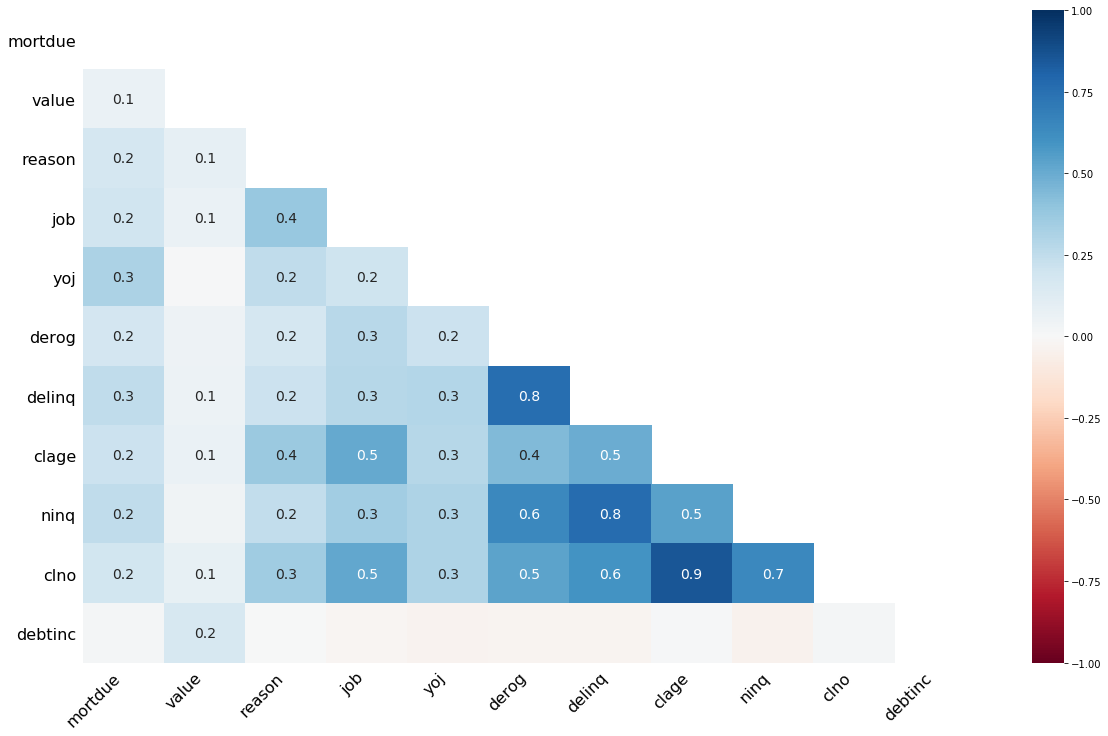

In [13]:
data_visualization = cl.Visualization(df_z)
data_visualization.missingvalues_heat_map()

In [15]:
# Data informasyon islemlerine girmeden sadece normal modele bir sokalim
# Veri temizleme yapmiyoruz Yapisal problemler var
# NA degerleri Drop edelim


from sklearn.preprocessing import LabelEncoder

df.dropna(inplace=True)
df1 = df.copy()

lbe = LabelEncoder()

df1["reason"] = lbe.fit_transform(df1["reason"])
df1  = pd.get_dummies(df1,columns= ["job"], prefix= ["job"])

In [16]:
y = df1["bad"]
X = df1.drop(["bad"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)

Results = cl.Methods()

In [32]:
Results.DecisionClassifier(X_train, y_train, X_test, y_test)

# Elde ettigimiz sonuclara gore best parametreleri goruyoruz
# Tune islemleri sonrasi model de iyi yonde bir degisme var
# Lakin Samples leaf dusuk olmasindan dolayı genellenebilirlik acisindan eksiklik olabilir

Fitting 10 folds for each of 15552 candidates, totalling 155520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2122 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 5370 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 9898 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 15738 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 22858 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 31290 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 41002 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 52026 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 64330 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 77946 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 92842 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 109050 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 126538 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 145

En iyi parametre degerleri:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}
Tune edilmemis modelin Accuaracy ve Confusion Matrixi: 
0.9346534653465347
[[455  11]
 [ 22  17]]
**********************************************
Tune sonrasi Accuaracy ve Confusion Matrix: 
0.9524752475247524
[[461   5]
 [ 19  20]]


* Birkac degisken islemi yapalim ve tekrar modele verelim.
* Karar agaclari daha cok kategorik degiskenler ile iyi tahmin yapmakta
* Buna yonelik birkac islem gerceklestirelim

In [17]:
# NINQ degiskenini kategorik olacak sekilde parcalara boluyoruz

a = df["ninq"] == 0
df["ninq"][a] = "a"

a = df["ninq"] == 1
df["ninq"][a] = "b"
a = df["ninq"] == 2
df["ninq"][a] = "b"
a = df["ninq"] == 3
df["ninq"][a] = "b"

a = df["ninq"] == 4
df["ninq"][a] = "c"
a = df["ninq"] == 5
df["ninq"][a] = "c"
a = df["ninq"] == 6
df["ninq"][a] = "c"

a = df["ninq"] == 7
df["ninq"][a] = "d"
a = df["ninq"] == 8
df["ninq"][a] = "d"
a = df["ninq"] == 9
df["ninq"][a] = "d"

a = df["ninq"] == 10
df["ninq"][a] = "e"
a = df["ninq"] == 11
df["ninq"][a] = "e"
a = df["ninq"] == 12
df["ninq"][a] = "e"
a = df["ninq"] == 13
df["ninq"][a] = "e"

In [18]:
df["ninq"].value_counts()

a    1014
b     898
c      69
d      25
e      12
Name: ninq, dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000
debtinc,2018.0,34.105829,8.438411,4.03,29.2955,34.949,38.9520,144.189


In [20]:
df["derog"].value_counts()

0.0     1823
1.0      128
2.0       48
3.0       12
4.0        3
6.0        1
8.0        1
10.0       1
7.0        1
Name: derog, dtype: int64

In [ ]:
# Simdi DEROG degiskeni icinde benzer islemi gerceklestirelim

In [21]:
As = df[df["derog"] == 0].index

df.loc[As,"derog"]= "A"

In [22]:
es = df[(df["derog"] == 1) | (df["derog"] == 2) | (df["derog"] == 3)].index

In [23]:
df.loc[es,"derog"]= "B"

In [24]:
se = df[(df["derog"] == 4) | (df["derog"] == 5) | (df["derog"] == 6) | (df["derog"] == 7) | (df["derog"] == 8) | (df["derog"] == 9) | (df["derog"] == 10)].index

df.loc[se,"derog"]= "C"

In [25]:
df["derog"].value_counts()

A    1823
B     188
C       7
Name: derog, dtype: int64

In [26]:
# Iki adet numeric degiskeni olceklendirerek kategorik yaptik simdi bu sekilde bir de modele verelim

lbe = LabelEncoder()

df["reason"] = lbe.fit_transform(df1["reason"])
df  = pd.get_dummies(df,columns= ["job"], prefix= ["job"])
df  = pd.get_dummies(df,columns= ["ninq"], prefix= ["ninq"])
df  = pd.get_dummies(df,columns= ["derog"], prefix= ["derog"])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bad         2018 non-null   int64  
 1   loan        2018 non-null   int64  
 2   mortdue     2018 non-null   float64
 3   value       2018 non-null   float64
 4   reason      2018 non-null   int64  
 5   yoj         2018 non-null   float64
 6   delinq      2018 non-null   float64
 7   clage       2018 non-null   float64
 8   clno        2018 non-null   float64
 9   debtinc     2018 non-null   float64
 10  job_Mgr     2018 non-null   uint8  
 11  job_Office  2018 non-null   uint8  
 12  job_Other   2018 non-null   uint8  
 13  job_ProfEx  2018 non-null   uint8  
 14  job_Sales   2018 non-null   uint8  
 15  job_Self    2018 non-null   uint8  
 16  ninq_a      2018 non-null   uint8  
 17  ninq_b      2018 non-null   uint8  
 18  ninq_c      2018 non-null   uint8  
 19  ninq_d      2018 non-null

In [28]:
df.head(2)

,bad,loan,mortdue,value,reason,yoj,delinq,clage,clno,debtinc,...,job_Sales,job_Self,ninq_a,ninq_b,ninq_c,ninq_d,ninq_e,derog_A,derog_B,derog_C
153,0,18200,94727.0,136877.0,0,15.0,0.0,168.96,26.0,36.056,...,0,0,0,1,0,0,0,1,0,0
154,0,21700,79240.0,96784.0,0,5.0,0.0,64.51,24.0,38.079,...,0,0,0,0,1,0,0,1,0,0


In [29]:
y = df["bad"]
X = df.drop(["bad"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,
                                                 test_size = 0.25)

Results = cl.Methods()

In [84]:
Results.DecisionClassifier(X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 15552 candidates, totalling 155520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2152 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 15768 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 22888 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 31320 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 41032 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 52056 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 64360 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 77976 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 92872 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 109080 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 126568 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 145

En iyi parametre degerleri:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tune edilmemis modelin Accuaracy ve Confusion Matrixi: 
0.9465346534653465
[[458   8]
 [ 19  20]]
**********************************************
Tune sonrasi Accuaracy ve Confusion Matrix: 
0.9584158415841584
[[465   1]
 [ 20  19]]


## Ayni Modeli bir de Foresk datasinda kullanalim

In [30]:
data = pd.read_excel(r"C:\Users\LENOVO\Desktop\KodluyoruzBootcamp\Ödevler Ve Çalışmalar\HW_Data_Set.xlsx")

In [31]:
info = cl.information(data)

info.info_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB
None 
Boyut Bilgisi:
 (6167, 136)


In [32]:
info.MissingValues()

,Missing_Values,Missing_values_rate %
ind_5,0,0.0
ind_6,0,0.0
ind_8,0,0.0
ind_9,0,0.0
ind_10,0,0.0
...,...,...
ind_426,0,0.0
ind_428,0,0.0
20_target,0,0.0
50_target,0,0.0


In [33]:
data.select_dtypes(include=['object'])

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388
...,...,...,...
6162,RED,-11,-270
6163,RED,-12,-271
6164,GREEN,-21,-280
6165,GREEN,-33,-292


In [34]:
# Soru isareti olan yerlere NaN basiyoruz ardindan bunlari ortalama ile doldurup OBJECT olanlari da numeric hale getiriyoruz

data.loc[data[data["ind_420"] == "?"].index] = np.nan 


data["ind_422"] = data["ind_422"].fillna(data.mean()["ind_422"])
data["ind_420"] = data["ind_420"].fillna(data.mean()["ind_420"])

data["ind_422"] = data["ind_422"].astype('int32')
data["ind_420"] = data["ind_420"].astype('int32')

# Geriye kalan NaN degiskenleri de dolduruyoruz

column = list(data.select_dtypes(include=["int32","float64"]))
data[column] = data[column].apply(lambda x: x.fillna(x.mean()),axis=0)

In [35]:
data.select_dtypes(include=['object'])

# Geriye sadece tek bir degiskenimiz kaldi object

,ind_109
0,GREEN
1,GREEN
2,GREEN
3,GREEN
4,GREEN
...,...
6162,RED
6163,RED
6164,GREEN
6165,GREEN


In [36]:
# Donusumu de hallediyoruz

data = pd.get_dummies(data,columns= ["ind_109"], prefix= ["ind_109"])

data = data.drop(["ind_109_RED"],axis=1)

In [37]:
# Simdi parcalama islemini yapalim

data.drop(labels=["20_target","90_target"],axis=1,inplace=True)

X = data.drop(labels="50_target",axis=1)
y = data["50_target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42,shuffle = False)

In [105]:
import Classes1 as cl

Results = cl.Methods()

Results.DecisionReg(X_train, y_train, X_test, y_test)

# Sonuc olarak Target 50 baz alindiginda Tune sonrasi iyi bir iyilesme sonucu elde edildi.

En iyi parametre degerleri:  {'max_leaf_nodes': 2, 'min_samples_leaf': 11, 'min_samples_split': 16}
Tune edilmemis rmse:  49.367452034691794 
Tune sonrasi rmse:  34.00425044098538
